<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/Answer_Key_Binning_and_Normalization_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Geetu Sodhi\Downloads\auto-mpg (1).csv') # Reading the csv file
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [ ]:
#1) Drop column Origin from the dataset.

df.drop(['origin'],axis=1, inplace=True)

TypeError: drop() got an unexpected keyword argument 'inpace'

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [ ]:
#Find out all the missing values in the dataset and replace it with its most appropriate replacement.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
origin          0
car name        0
CAR Number      7
dtype: int64

In [ ]:
#Let's check the other values in that row
df[df['acceleration'].isnull()]



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
21,24,4,107.0,90,2430,NaN,70.0,2,audi 100 ls,JH5673R
53,31,4,71.0,65,1773,NaN,71.0,3,toyota corolla 1200,T568G4


In [ ]:
#Evaluate MEAN
df['acceleration'].mean()

14.046875

In [ ]:
#Evaluate Mode
df['acceleration'].mode()

0    12.0
1    14.5
2    15.5
dtype: float64

In [ ]:
#Evaluate Median
df['acceleration'].median()

14.0

In [ ]:
#Replace
df['acceleration'] = df['acceleration'].fillna( df['acceleration'].median())

In [ ]:
#Check
df.iloc[[21,53]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
21,24,4,107.0,90,2430,14.0,70.0,2,audi 100 ls,JH5673R
53,31,4,71.0,65,1773,14.0,71.0,3,toyota corolla 1200,T568G4


In [ ]:
#Find and remove duplicate entries

#df[df['CAR Number'].duplicated()]  OR

df[df.duplicated(subset=['CAR Number'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
17,15,8,383.0,170,3563,10.0,70.0,1,dodge challenger se,TN5678
26,10,8,307.0,200,4376,15.0,70.0,1,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,3,datsun pl510,NaN
32,25,4,98.0,?,2046,19.0,71.0,1,ford pinto,NaN
34,16,6,225.0,105,3439,15.5,71.0,1,plymouth satellite custom,JHGY59
52,30,4,88.0,76,2065,14.5,71.0,2,fiat 124b,NaN
54,35,4,72.0,69,1613,18.0,71.0,3,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,1,chevrolet chevelle concours (sw),NaN


In [ ]:
#~df['CAR Number'].duplicated(keep='first')
df['CAR Number'].drop_duplicates(keep='first',inplace=True)


In [ ]:
# #	Display the first five and last five rows
# 	Display all the column names in the dataset
# 	Display the concise summary of your dataset
# 	Display the name of the car with maximum number of horsepower.

df.head()
df.tail()
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,98.000000,98.000000,98.000000,98.00000,96.000000,96.000000,98.000000
mean,18.397959,6.316327,254.423469,3342.22449,14.046875,71.260417,1.367347
std,5.872775,1.869985,124.791731,973.39107,3.022789,1.038671,0.679414
min,9.000000,3.000000,70.000000,1613.00000,8.000000,70.000000,1.000000
25%,14.000000,4.000000,120.000000,2372.75000,12.000000,70.000000,1.000000
50%,17.000000,8.000000,302.000000,3437.50000,14.000000,71.000000,1.000000
75%,23.000000,8.000000,350.750000,4230.00000,15.500000,72.000000,1.750000
max,35.000000,8.000000,455.000000,5140.00000,23.500000,73.000000,3.000000


In [ ]:
df2 = df [['car name','horsepower']][df.horsepower==df['horsepower'].max()]

In [ ]:
df2

,car name,horsepower
8,pontiac catalina,225
13,buick estate wagon (sw),225
95,buick electra 225 custom,225


In [ ]:
#Rename the column
df.rename(columns = {"mpg":"L/100km"},inplace =True)
df

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,1,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,1,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,1,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,1,amc ambassador brougham,TGTYY67


In [ ]:
#Normalize

df['weight'] = df['weight']/df['weight'].max()
df


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,0.681712,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.718482,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,0.668482,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,0.667899,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,0.671012,10.5,70.0,1,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,0.824319,14.5,73.0,1,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,0.921206,11.0,73.0,1,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,0.963230,11.0,73.0,1,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,0.743385,11.0,73.0,1,amc ambassador brougham,TGTYY67


In [ ]:
# Categories  binning

df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)
df["horsepower"]=df["horsepower"].astype(int, copy=True)
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

Text(0.5, 1.0, 'horsepower bins')

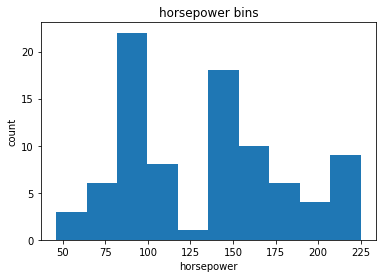

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
group_names = ['Low', 'Medium', 'High']
#We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
5,198,High
6,220,High
7,215,High
8,225,High
10,170,High


In [ ]:
#Z Score
from scipy import stats

df['zscore']=stats.zscore(df["acceleration"])
#outlier=np.where(score>3)
df.loc[df['zscore'].abs()>3]

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,horsepower-binned,zscore
59,23,4,97.0,54,0.438521,23.5,72.0,2,volkswagen type 3,ERT566,Low,3.257699
